<center>
    <h1>Convolutional Neural Networks (CNN)</h1>
</center>

# Brief Recap of Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a specialized class of deep learning models designed primarily for processing structured grid-like data, particularly images. They have revolutionized the field of computer vision and are widely used for tasks such as image classification, object detection, and facial recognition.

CNNs are inspired by the organization of the animal visual cortex and are particularly effective at capturing spatial hierarchies and patterns in visual data. Their ability to automatically learn relevant features from raw input makes them powerful tools for image analysis tasks.

## CNN Architecture

A typical CNN architecture consists of several key components:

### Convolutional Layers

Convolutional layers form the core of a CNN. They apply learnable filters (kernels) to the input, detecting various features such as edges, textures, and patterns. Key characteristics include:

- **Local connectivity**: Each neuron connects to only a small region of the input
- **Parameter sharing**: The same filter is applied across the entire input
- **Translation invariance**: Features can be detected regardless of their position in the image

In [1]:
def convolve2d_naive(image, kernel):
    # Get dimensions of the image and kernel
    img_height, img_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])

    # Determine the padding size (assuming kernel size is odd)
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the image with zeros
    padded_image = [[0] * (img_width + 2 * pad_w) for _ in range(img_height + 2 * pad_h)]
    for i in range(img_height):
        for j in range(img_width):
            padded_image[i + pad_h][j + pad_w] = image[i][j]

    # Prepare the output image
    output = [[0] * img_width for _ in range(img_height)]

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            result = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    result += (padded_image[i + ki][j + kj] * kernel[ki][kj])
            output[i][j] = result

    return output

# Example grayscale image (5x5)
image = [
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
]

# Example 3x3 kernel (edge detection)
kernel = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]

# Perform convolution
convolved_image = convolve2d_naive(image, kernel)

# Print the result
for row in convolved_image:
    print(row)


[-70, -90, -60, -30, 170]
[150, 0, 0, 0, 330]
[300, 0, 0, 0, 480]
[450, 0, 0, 0, 630]
[1130, 810, 840, 870, 1370]


### Pooling Layers

Pooling layers reduce the spatial dimensions of the feature maps, making the network more computationally efficient and helping to achieve spatial invariance. Common types include:

- Max pooling: Selecting the maximum value in each pooling window
- Average pooling: Calculating the average value in each pooling window

### Fully Connected Layers

These layers typically appear at the end of the network and are responsible for:

- Combining features learned by convolutional layers
- Performing high-level reasoning
- Producing the final output (e.g., class probabilities for classification tasks)

### Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Common choices include ReLU (Rectified Linear Unit) for hidden layers and softmax for the output layer in classification tasks.

By stacking multiple convolutional and pooling layers, followed by fully connected layers, CNNs can effectively learn hierarchical representations of visual data. Lower layers typically capture low-level features like edges and textures, while deeper layers learn more complex, high-level features specific to the task at hand.

<center>
    <img src="static/image1.jpg" alt="CNN Architecture" style="width:50%;">
</center>

## Advantages of CNNs

- **Automatic Feature Extraction:** CNNs learn and extract relevant features from raw data without manual feature engineering, making them highly adaptable to various tasks and datasets.

- **Translation Invariance:** CNNs can recognize patterns regardless of their position in the image, making them robust to object translations, rotations, and scaling.

- **Parameter Sharing:** The use of shared weights in convolutional layers reduces the number of parameters, improving computational efficiency and generalization.

- **Hierarchical Feature Learning:** CNNs learn hierarchical representations of data, with lower layers capturing simple features and deeper layers learning complex, abstract features.

# Implementing CNN with TensorFlow

TensorFlow provides an easy way to implement Convolutional Neural Networks (CNNs) using the `tf.keras.layers` module. Here's an overview of the key components:

## Key Layers

### `Conv2D`: 2D convolution layer

- This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.

- If use_bias is True, a bias vector is created and added to the outputs.
- Finally, if activation is not None, it is applied to the outputs as well.
- Key Parameters:
  - `filters`: Number of output filters in the convolution
  - `kernel_size`: Size of the convolution kernel
  - `activation`: Activation function to use
  - `padding`: Padding method, either 'valid' or 'same'
  - `strides`: Stride length of the convolution
  - `input_shape`: Shape of the input (for the first layer)
- Expected Output: A 4D tensor with shape (batch_size, new_height, new_width, filters)
- For more information, refer this link: [TensorFlow Conv2D documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

In [2]:
# Example Code: Conv2D Layer
import numpy as np
from tensorflow import keras

x = np.random.rand(4, 10, 10, 128)
y = keras.layers.Conv2D(32, 3, activation='relu')(x)
print(y.shape)

(4, 8, 8, 32)


### `MaxPooling2D`: Max pooling operation for 2D spatial data

- Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.

- The window is shifted by strides along each dimension.

- The resulting output when using the "valid" padding option has a spatial shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)

- The resulting output shape when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1
- Key Parameters:
  - `pool_size`: Size of the pooling window
  - `strides`: Stride length of the pooling operation
  - `padding`: Padding method, either 'valid' or 'same'
- Expected Output: A 4D tensor with reduced spatial dimensions

- For more information, refer this link: [TensorFlow MaxPool2D documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

In [3]:
# Example Code: MaxPooling2D Layer
x = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.]])
x = np.reshape(x, [1, 3, 3, 1])
max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding="valid")
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

### `Flatten`: Flattens the input

- Flattens the input.
- Does not affect the batch size.
- Key Parameters:
  - `data_format`: Specifies the channel order ('channels_last' or 'channels_first')
- Expected Output: A 2D tensor with shape (batch_size, flattened_features)

- For more information, refer this link: [TensorFlow Flatten documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

In [4]:
# Example Code: Flatten Layer
x = keras.Input(shape=(10, 64))
y = keras.layers.Flatten()(x)
y.shape

(None, 640)

### `Dense`: Fully connected layer

- Just your regular densely-connected NN layer.

- Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

- Key Parameters:
  - `units`: Dimensionality of the output space
  - `activation`: Activation function to use
  - `use_bias`: Whether to include a bias vector
  - `kernel_initializer`: Initializer for the kernel weights matrix
  - `bias_initializer`: Initializer for the bias vector

- Expected Output: A tensor with shape (batch_size, units)

- For more information, refer this link: [TensorFlow Dense documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

### A simple CNN model

In [5]:
# Example of a Simple CNN Model
import numpy as np
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Key Points on the above code snippet


- The `Conv2D` layers apply convolution operations to extract features from the input images.
- `MaxPooling2D` layers reduce the spatial dimensions of the feature maps.
- The `Flatten` layer converts the 2D feature maps to a 1D vector for input to the dense layers.
- Dense layers at the end perform the final classification.
- The model is compiled with an optimizer, loss function, and metrics.

# Let's Build a Real world Project to understand the concept of CNNs better

# The CIFAR-10 Problem

- CIFAR-10 is a widely-used dataset for image classification, consisting of 60,000 32x32 color images across 10 classes.

- The dataset is divided into 50,000 training images and 10,000 test images, with 6,000 images per class.
- The task is to train a model that can accurately classify these images into their correct categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

- For more information, refer to this link: [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

## Loading and Preprocessing data for CNN

Here, for learning, we will be using the CIFAR-10 dataset  available in the TensorFlow datasets

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the CIFAR-10 dataset
(train_ds, test_ds), ds_info = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)

# Get the number of classes
num_classes = ds_info.features['label'].num_classes

print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of test examples: {ds_info.splits['test'].num_examples}")
print(f"Number of classes: {num_classes}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.965U4R_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.965U4R_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Number of training examples: 50000
Number of test examples: 10000
Number of classes: 10


### Normalizing pixel values

To improve model training, we need to normalize the pixel values to be between 0 and 1. We can do this by dividing the pixel values by 255:

In [8]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization to both training and test datasets
train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

### One-hot encoding labels

While TensorFlow can work with integer labels directly, some models may require one-hot encoded labels. Here's how to apply one-hot encoding:

In [9]:
def one_hot_encode(image, label):
    return image, tf.one_hot(tf.cast(label, tf.int32), ds_info.features['label'].num_classes)

# Apply one-hot encoding to both training and test datasets
train_ds = train_ds.map(one_hot_encode)
test_ds = test_ds.map(one_hot_encode)

The `tf.one_hot()` function creates a one-hot tensor for each label[7]. For CIFAR-10, this will create a 10-dimensional vector for each label, where the index corresponding to the class is set to 1 and all other indices are 0.

## Preparing the datasets for training

Finally, we can prepare the datasets for efficient training by caching the datasets, shuffling the training data, batching the datasets, and prefetching data for improved performance during training:


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64

train_ds = train_ds.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test_ds.cache().batch(BATCH_SIZE).prefetch(AUTOTUNE)

## Training the CNN model

### Splitting data into training and validation sets

We'll use part of the training data as a validation set to monitor our model's performance during training:

In [11]:
# Assuming train_ds is your full training dataset
train_size = 45000
val_size = 5000

train_ds = train_ds.take(train_size)
val_ds = train_ds.skip(train_size).take(val_size)

### Setting up training parameters


In [12]:
BATCH_SIZE = 64
EPOCHS = 20

### Designing the model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model using model.fit()

In [14]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.3202 - loss: 1.8329 - val_accuracy: 0.5067 - val_loss: 1.3752
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5339 - loss: 1.3137 - val_accuracy: 0.5795 - val_loss: 1.1796
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5972 - loss: 1.1487 - val_accuracy: 0.6156 - val_loss: 1.0847
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6323 - loss: 1.0440 - val_accuracy: 0.6409 - val_loss: 1.0157
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6638 - loss: 0.9648 - val_accuracy: 0.6643 - val_loss: 0.9561
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6845 - loss: 0.9013 - val_accuracy: 0.6464 - val_loss: 1.0072
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7042 - loss: 0.8463 - val_accuracy: 0.6808 - val_loss: 0.9157
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7190 - loss: 0.8034 - val_accuracy: 

## Visualizing training history (accuracy and loss curves)

After training, the training history can be visualized as:

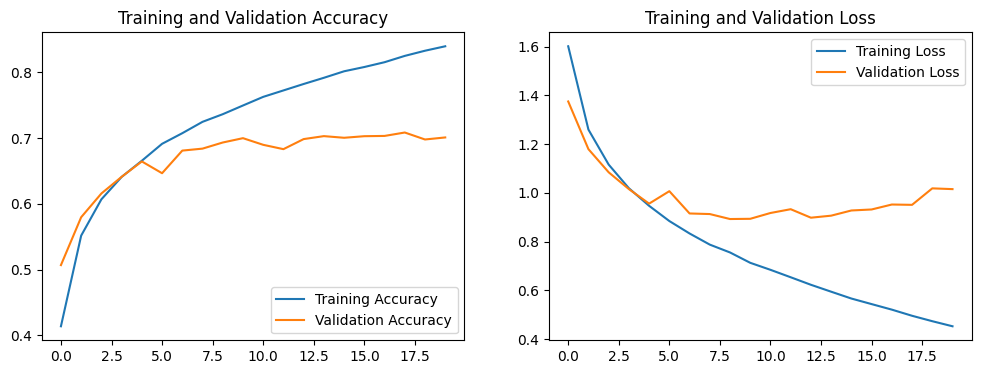

In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

## Important observations from the model training

1. Training Progress:
- The model's training accuracy improves from about 54.72% in the first epoch to 87.30% by the 20th epoch.
- The training loss decreases from 1.2759 to 0.3524 over the 20 epochs.

2. Validation Performance:
- The validation accuracy improves from 57.93% to a peak of 71.79% (in epoch 15), but then declines slightly.
- The validation loss initially decreases but starts increasing after a certain point.

3. Overfitting:
- There's a clear sign of overfitting as the training continues. The training accuracy and loss continue to improve, but the validation metrics start to worsen after a certain point.
- The gap between training and validation accuracy widens significantly in later epochs.

## How to avoid overfitting?

### Data Augmentation Techniques


Data augmentation is a technique used to increase the diversity of our training set by applying random (but realistic) transformations to the existing images. This helps the model generalize better and reduces overfitting. Our augmentation function applies three transformations:

1. Random horizontal flip
2. Random brightness adjustment
3. Random contrast adjustment


For more details on these functions, refer to the TensorFlow documentation:

- [random_flip_left_right](https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right)
- [random_brightness](https://www.tensorflow.org/api_docs/python/tf/image/random_brightness)
- [random_contrast](https://www.tensorflow.org/api_docs/python/tf/image/random_contrast)

In [16]:
# Data Augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

In [17]:
# Load the CIFAR-10 dataset
(train_ds, test_ds), ds_info = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)

# Normalize pixel values and one-hot encode labels
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, ds_info.features['label'].num_classes)
    return image, label

# Data augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

# Apply preprocessing and augmentation
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (train_ds
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .cache()
            .shuffle(10000)
            .batch(BATCH_SIZE)
            .map(augment, num_parallel_calls=AUTOTUNE)
            .prefetch(AUTOTUNE))

test_ds = (test_ds
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .batch(BATCH_SIZE)
           .cache()
           .prefetch(AUTOTUNE))

### Introduce dropout and L2 regularization


#### Dropout

- Dropout is a regularization technique where randomly selected neurons are ignored during training. This helps prevent complex co-adaptations on the training data and reduces overfitting. In our model, we use dropout after convolutional and dense layers:

- Example
    ```python
    layers.Dropout(0.25)  # After convolutional layers
    layers.Dropout(0.5)   # After dense layer
    ```

- The argument to Dropout represents the fraction of units to drop.

- [TensorFlow Dropout Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

#### L2 Regularization

L2 regularization (also known as weight decay) adds a penalty term to the loss function, discouraging the weights from becoming too large. This helps in creating a simpler model that's less likely to overfit. We apply L2 regularization to the kernel weights of our convolutional and dense layers:

```python
kernel_regularizer=regularizers.l2(0.01)
```

The argument 0.01 is the regularization factor, controlling the strength of the regularization.

[TensorFlow Regularizers Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)

#### Modified Model Architecture with Dropout and Regularization

By combining these techniques, we aim to create a model that generalizes well to unseen data, reducing the gap between training and validation performance.

In [18]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Create the CNN model with dropout and L2 regularization
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Explicitly define input shape
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Early Stopping

- Early stopping is a technique used to prevent overfitting by halting the training process when the model's performance on the validation set stops improving. We implement this using Keras' EarlyStopping callback:

- Key components:
    - `monitor='val_loss'`: We monitor the validation loss to determine when to stop training.
    - `patience=5`: Training will stop if the monitored metric doesn't improve for 5 consecutive epochs.
    - `restore_best_weights=True`: This ensures that we keep the model weights from the epoch with the best performance.
    - `EPOCHS = 50`: We set a maximum of 50 epochs, but early stopping may end training earlier if no improvement is observed.

- Early stopping helps us find the optimal point to stop training, balancing between underfitting and overfitting. It allows us to train for a potentially longer time without the risk of severe overfitting, as we'll revert to the best weights once the model's performance plateaus.

For more details, refer to the TensorFlow documentation:
[EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [19]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
EPOCHS = 50  # Increased epochs, but early stopping will likely end training earlier

## Re-training the model again to prevent overfitting

In [20]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1972 - loss: 2.5935 - val_accuracy: 0.3407 - val_loss: 1.9318
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3043 - loss: 1.9778 - val_accuracy: 0.3685 - val_loss: 1.9029
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3245 - loss: 1.9369 - val_accuracy: 0.3627 - val_loss: 1.8357
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3495 - loss: 1.8971 - val_accuracy: 0.4155 - val_loss: 1.7868
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3708 - loss: 1.8632 - val_accuracy: 0.4426 - val_loss: 1.6914
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3889 - loss: 1.8285 - val_accuracy: 0.4496 - val_loss: 1.6679
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3963 - loss: 1.8040 - val_accuracy: 0.4643 - val_loss: 1.6527
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4047 - loss: 1.7864 - val_accuracy: 

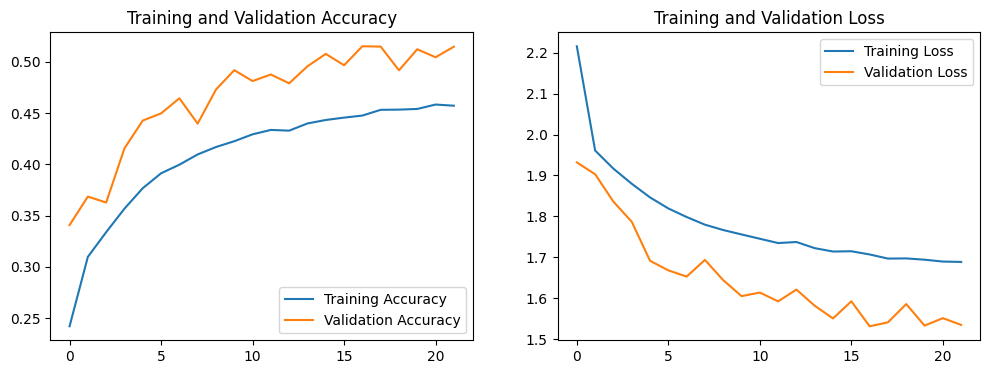

In [21]:
# Visualize the training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

## Important observations from the model training

1. Training Progress:
    - The model's training accuracy improves from 18.11% in the first epoch to 45.33% by the 37th epoch.
    - The training loss decreases from 2.5511 to 1.6879 over the 37 epochs.

2. Validation Performance:
    - The validation accuracy improves from 33.42% in the first epoch to a peak of 51.92% (in epoch 33).
    - The validation loss decreases from 1.9670 to 1.5305 over the course of training.

3. Underfitting:
    - There's a clear sign of underfitting as both training and validation accuracies remain relatively low for the CIFAR-10 dataset.
    - The gap between training and validation accuracy remains small, with validation accuracy consistently higher than training accuracy.
    - Both training and validation losses remain high throughout the training process, indicating the model's struggle to fit the data well.

## How to avoid underfitting?

#### Increase Model Capacity:

- Add more convolutional layers
- Increase the number of filters in existing layers
- Add more dense layers or increase the number of neurons in existing dense layers

- For more information, refer to this link:

    - [Keras Sequential Model Guide](https://www.tensorflow.org/guide/keras/sequential_model)

    - [Dense Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

#### Reduce Regularization:

- Decrease dropout rates

- Reduce L2 regularization strength
- For more information, refer to this link:
    - [Keras Regularizers](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
    - [Dropout Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

#### Add Batch Normalization:

- Include batch normalization layers after convolutional layers

- For more information, refer to this link: [Batch Normalization Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

## Re-training the model again to prevent underfitting

In [22]:
# Create the CNN model with dropout and L2 regularization
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [23]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.3850 - loss: 2.8846 - val_accuracy: 0.5889 - val_loss: 1.7264
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6495 - loss: 1.5299 - val_accuracy: 0.6672 - val_loss: 1.3275
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7245 - loss: 1.1742 - val_accuracy: 0.7463 - val_loss: 1.0797
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7624 - loss: 1.0374 - val_accuracy: 0.7830 - val_loss: 1.0019
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7865 - loss: 0.9923 - val_accuracy: 0.7920 - val_loss: 0.9608
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8021 - loss: 0.9487 - val_accuracy: 0.7719 - val_loss: 1.0507
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8180 - loss: 0.9035 - val_accuracy: 0.8144 - val_loss: 0.9068
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8303 - loss: 0.8657 - 

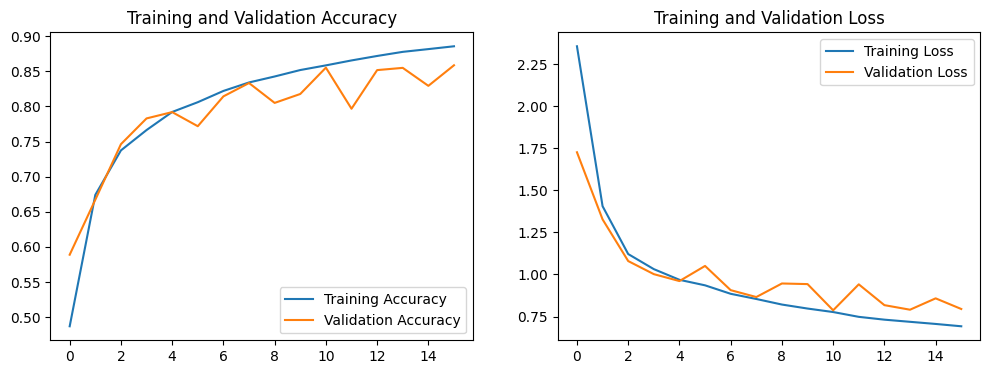

In [24]:
import matplotlib.pyplot as plt

# Visualize the training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

## Important observations from the model training

1. Rapid Initial Improvement:
   - Both training and validation accuracies improve rapidly in the first few epochs, with training accuracy increasing from 38.38% to 82.97% and validation accuracy from 56.71% to 82.23% by epoch 8.
   - This suggests that the model is learning effectively and is not underfitting.

2. Divergence Between Training and Validation Accuracy:
   - As training progresses, a gap develops between training and validation accuracies.
   - By the final epoch, training accuracy reaches 94.59% while validation accuracy is at 89.98%.
   - This growing gap is an indicator of some overfitting, as the model is performing better on the training data than on unseen validation data.

3. Plateauing of Validation Accuracy:
   - Validation accuracy shows slower improvement after about epoch 20, fluctuating between 87% and 90%.
   - Meanwhile, training accuracy continues to improve, reaching over 94%.
   - This plateauing of validation accuracy while training accuracy continues to improve is another sign of overfitting.

4. Final Performance:
   - The final test accuracy of 89.98% is good for the CIFAR-10 dataset, indicating that despite some overfitting, the model generalizes reasonably well.
   - The model is not underfitting, as both training and validation accuracies are high.

## Conclusion

In conclusion, the model shows signs of slight to moderate overfitting, evidenced by the growing gap between training and validation accuracies and the plateauing of validation accuracy.

However, the high final test accuracy suggests that this overfitting is not severe enough to significantly compromise the model's performance on unseen data.